# Violin plots

Some example plots.
To replicate, just install the imports, download "cellular_dataframe.parquet" from [IEEE Dataport](https://ieee-dataport.org/open-access/berlin-v2x) and place it in a convenient path

In [1]:
from pathlib import Path

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data_path = Path.cwd().parent/"data"
plot_dir =  Path.cwd().parent/"plots"

dataframe_path = data_path/"cellular_dataframe.parquet"

In [3]:
cell_df = pd.read_parquet(dataframe_path)

## Data exploration

In [4]:
cell_df.columns

Index(['device', 'ping_ms', 'datarate', 'jitter', 'ts_gps', 'Latitude',
       'Longitude', 'Altitude', 'speed_kmh', 'COG', 'precipIntensity',
       'precipProbability', 'temperature', 'apparentTemperature', 'dewPoint',
       'humidity', 'pressure', 'windSpeed', 'cloudCover', 'uvIndex',
       'visibility', 'Traffic Jam Factor', 'Traffic Street Name',
       'Traffic Distance', 'Pos in Ref Round', 'measurement', 'area',
       'PCell_RSRP_1', 'PCell_RSRP_2', 'PCell_RSRP_max', 'PCell_RSRQ_1',
       'PCell_RSRQ_2', 'PCell_RSRQ_max', 'PCell_RSSI_1', 'PCell_RSSI_2',
       'PCell_RSSI_max', 'PCell_SNR_1', 'PCell_SNR_2', 'PCell_E-ARFCN',
       'PCell_Downlink_Num_RBs', 'PCell_Downlink_TB_Size',
       'PCell_Uplink_Num_RBs', 'PCell_Uplink_TB_Size',
       'PCell_Uplink_Tx_Power_(dBm)', 'PCell_Cell_ID',
       'PCell_Downlink_frequency', 'PCell_Uplink_frequency',
       'PCell_Downlink_bandwidth_MHz', 'PCell_Uplink_bandwidth_MHz',
       'PCell_Cell_Identity', 'PCell_TAC', 'PCell_Band_In

## Plots

In [5]:
datarate_label = "Datarate [Mbps]"


# Preprocessing: remove unknown areas and add datarate in mbps
cell_df = cell_df.query("`area`!= 'UNKNOWN'")
cell_df[datarate_label] = cell_df['datarate']/1e6

### Comparison of areas

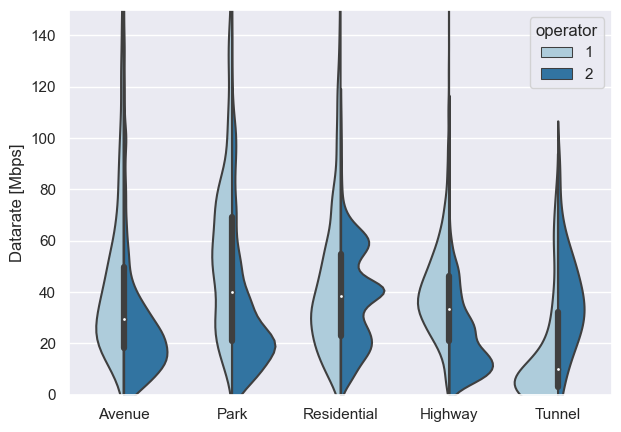

In [6]:
rate_lim = (0,150)
plot_df = cell_df.query("`scenario` == 'A3D' & `drive_mode` == 'platoon'")

sns.violinplot(data=plot_df, x="area", y=datarate_label, hue='operator',
               palette='Paired', split=True)
plt.ylim(rate_lim)
plt.xlabel(None)
#plt.title("Downlink measurements")
plt.gcf().set_size_inches(7, 5)
plt.savefig(plot_dir/"datarate_DL_violin.pdf", bbox_inches='tight')